In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
data = pd.read_csv('preprocessed_air_quality_index.csv')

In [ ]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
target_aqi = 'AQI'
auxiliary_targets = ['Primary Pollutant', 'Health Advisory', 'Suggested Solution']

In [ ]:
X = data[features]
y_aqi = data[target_aqi]
y_auxiliary = data[auxiliary_targets]

In [ ]:
label_encoders = {col: LabelEncoder() for col in auxiliary_targets}
for col in auxiliary_targets:
    y_auxiliary[col] = label_encoders[col].fit_transform(y_auxiliary[col])

<ipython-input-7-b3b152c6d705>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_auxiliary[col] = label_encoders[col].fit_transform(y_auxiliary[col])
<ipython-input-7-b3b152c6d705>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_auxiliary[col] = label_encoders[col].fit_transform(y_auxiliary[col])
<ipython-input-7-b3b152c6d705>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
# Split data
X_train, X_test, y_train_aqi, y_test_aqi = train_test_split(X, y_aqi, test_size=0.2, random_state=42)
y_train_aux, y_test_aux = train_test_split(y_auxiliary, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest model for AQI prediction
rf_aqi = RandomForestRegressor(random_state=42, n_estimators=100)
rf_aqi.fit(X_train, y_train_aqi)


RandomForestRegressor(random_state=42)

In [ ]:
# Train Auxiliary targets
aux_models = {}
for col in auxiliary_targets:
    aux_model = RandomForestRegressor(random_state=42, n_estimators=100)
    aux_model.fit(X_train, y_train_aux[col])
    aux_models[col] = aux_model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Evaluate
y_train_pred_aqi = rf_aqi.predict(X_train)
y_test_pred_aqi = rf_aqi.predict(X_test)
train_r2 = r2_score(y_train_aqi, y_train_pred_aqi)
test_r2 = r2_score(y_test_aqi, y_test_pred_aqi)
print(train_r2)
print(test_r2)

0.9886297834045475
0.9078222838883846


In [ ]:

train_mse = mean_squared_error(y_train_aqi, y_train_pred_aqi)
train_r2 = r2_score(y_train_aqi, y_train_pred_aqi)
test_mse = mean_squared_error(y_test_aqi, y_test_pred_aqi)
test_r2 = r2_score(y_test_aqi, y_test_pred_aqi)

In [ ]:
tolerance = 30  # AQI tolerance threshold
train_accuracy = sum(abs(y_train_aqi - y_train_pred_aqi) <= tolerance) / len(y_train_aqi) * 100
test_accuracy = sum(abs(y_test_aqi - y_test_pred_aqi) <= tolerance) / len(y_test_aqi) * 100
print(train_accuracy)
print(test_accuracy)

96.96112021450917
80.42183031458532


In [ ]:
print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Testing R2 Score: {test_r2}")

Training Mean Squared Error: 167.10554676815596
Training R2 Score: 0.9886297834045475
Testing Mean Squared Error: 1351.430915090425
Testing R2 Score: 0.9078222838883846


In [ ]:
# Visualize Training and Testing Actual vs. Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

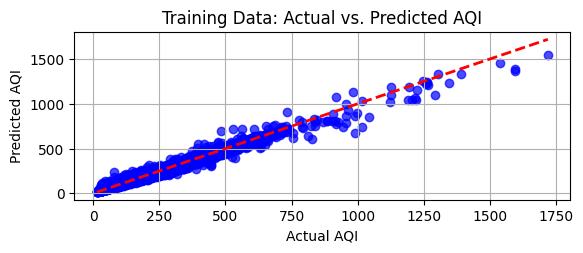

In [ ]:
plt.subplot(2, 1, 1)
plt.scatter(y_train_aqi, y_train_pred_aqi, alpha=0.7, color='blue')
plt.plot([y_train_aqi.min(), y_train_aqi.max()], [y_train_aqi.min(), y_train_aqi.max()], '--r', linewidth=2)
plt.title('Training Data: Actual vs. Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid()

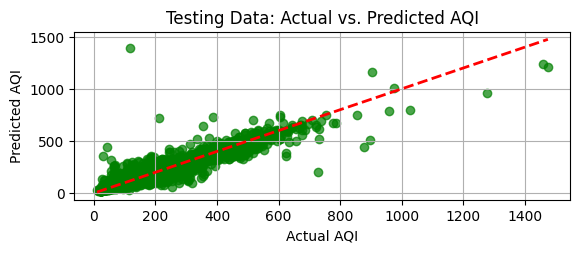

In [ ]:
plt.subplot(2, 1, 2)
plt.scatter(y_test_aqi, y_test_pred_aqi, alpha=0.7, color='green')
plt.plot([y_test_aqi.min(), y_test_aqi.max()], [y_test_aqi.min(), y_test_aqi.max()], '--r', linewidth=2)
plt.title('Testing Data: Actual vs. Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid()

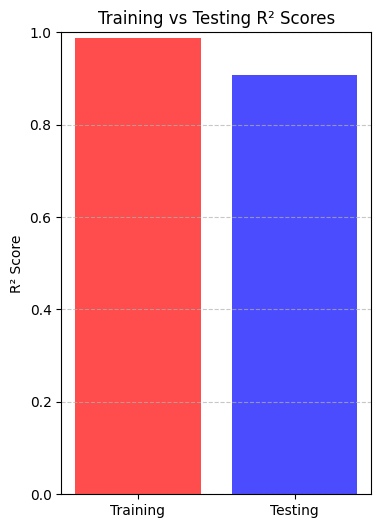

In [ ]:
# R² Scores with Bar Graph
plt.figure(figsize=(4, 6))
plt.bar(['Training', 'Testing'], [train_r2, test_r2], color=['red', 'blue'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Training vs Testing R² Scores')
plt.ylabel('R² Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("\nEnter pollutant values to predict AQI and auxiliary targets:")
pm25 = float(input("PM2.5 (µg/m³): "))
pm10 = float(input("PM10 (µg/m³): "))
no = float(input("NO (µg/m³): "))
no2 = float(input("NO2 (µg/m³): "))
nox = float(input("NOx (µg/m³): "))
nh3 = float(input("NH3 (µg/m³): "))
co = float(input("CO (mg/m³): "))
so2 = float(input("SO2 (µg/m³): "))
o3 = float(input("O3 (µg/m³): "))



Enter pollutant values to predict AQI and auxiliary targets:
PM2.5 (µg/m³): 0
PM10 (µg/m³): 10
NO (µg/m³): 20
NO2 (µg/m³): 30
NOx (µg/m³): 40
NH3 (µg/m³): 50
CO (mg/m³): 60
SO2 (µg/m³): 10
O3 (µg/m³): 20


In [ ]:
# Create a DataFrame for the input values
custom_input = pd.DataFrame([[pm25, pm10, no, no2, nox, nh3, co, so2, o3]], columns=features)

# Predict AQI
predicted_aqi = rf_aqi.predict(custom_input)[0]
predicted_aqi

658.08

In [ ]:
aux_predictions = {}
for col in auxiliary_targets:
    encoded_pred = aux_models[col].predict(custom_input)[0]
    aux_predictions[col] = label_encoders[col].inverse_transform([int(round(encoded_pred))])[0]


In [ ]:
print(f"Predicted Primary Pollutant: {aux_predictions['Primary Pollutant']}")
print(f"Predicted Health Advisory: {aux_predictions['Health Advisory']}")
print(f"Predicted Suggested Solution: {aux_predictions['Suggested Solution']}")

Predicted Primary Pollutant: PM10
Predicted Health Advisory: Health alert: everyone may experience more serious health effects.
Predicted Suggested Solution: Reduce outdoor activities, especially for sensitive individuals.


In [ ]:
import pickle
import os
import zipfile

# Save the AQI model
with open('aqi_model.pkl', 'wb') as f:
    pickle.dump(rf_aqi, f)

# Save the auxiliary models
for col, model in aux_models.items():
    with open(f'{col}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Save the label encoders
for col, encoder in label_encoders.items():
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(encoder, f)

# Create a ZIP file to bundle all the .pkl files
zip_filename = "models_and_encoders.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in os.listdir():
        if file.endswith('.pkl'):
            zipf.write(file)
print(f"All models and encoders have been bundled into {zip_filename}")


All models and encoders have been bundled into models_and_encoders.zip


In [ ]:
#DEPLOY

In [ ]:
!pip install flask-ngrok
!pip install flask


In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
!unzip ngrok-v3-stable-linux-amd64.zip


--2025-01-20 20:04:37--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.71.179.82, 75.2.60.68, 99.83.220.108, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.71.179.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14931166 (14M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.zip’

ngrok-v3-stable-lin 100%[===================>]  14.24M  50.0MB/s    in 0.3s    

2025-01-20 20:04:37 (50.0 MB/s) - ‘ngrok-v3-stable-linux-amd64.zip’ saved [14931166/14931166]

Archive:  ngrok-v3-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 2ruJy0BSxQ5ZDcLC2oFUQvPGfYN_2KBjHJgEQPJrK7dQgzdh3


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [35]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import subprocess


with open('aqi_model.pkl', 'rb') as f:
    rf_aqi = pickle.load(f)

aux_models = {}
label_encoders = {}
auxiliary_targets = ['Primary Pollutant', 'Health Advisory', 'Suggested Solution']

for col in auxiliary_targets:
    with open(f'{col}_model.pkl', 'rb') as f:
        aux_models[col] = pickle.load(f)
    with open(f'{col}_encoder.pkl', 'rb') as f:
        label_encoders[col] = pickle.load(f)


features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']


app = Flask(__name__)

@app.route('/')
def home():
    return "Air Quality Prediction API is up and running!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    try:

        input_data = pd.DataFrame([data], columns=features)


        predicted_aqi = rf_aqi.predict(input_data)[0]


        aux_predictions = {}
        for col in auxiliary_targets:
            encoded_pred = aux_models[col].predict(input_data)[0]
            aux_predictions[col] = label_encoders[col].inverse_transform([int(round(encoded_pred))])[0]


        response = {
            "Predicted AQI": predicted_aqi,
            "Predicted Primary Pollutant": aux_predictions['Primary Pollutant'],
            "Predicted Health Advisory": aux_predictions['Health Advisory'],
            "Predicted Suggested Solution": aux_predictions['Suggested Solution']
        }
        return jsonify(response)
    except Exception as e:
        return jsonify({"error": str(e)})

# Start ngrok
def start_ngrok():
    print("Starting ngrok...")
    ngrok_process = subprocess.Popen(['./ngrok', 'http', '5000'])
    print("ngrok started!")
    return ngrok_process

if __name__ == '__main__':
    ngrok_process = start_ngrok()
    app.run(port=5000)


Starting ngrok...
ngrok started!
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
